##  PROJECT 1  (API Call) -  Tobacco Use 
### Tobacco use is one of the leading causes of preventable deaths in the United States

In [1]:
# Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

query_url = "https://chronicdata.cdc.gov/resource/dttw-5yxu.json?class=Tobacco+Use&break_out_category=Overall&topic=Current+Smoker+Status&year="

years_list = ["2011","2012","2013","2014","2015","2016","2017","2018"]

# set up lists to hold reponse info
response_list = []
state_list = []
year_list=[]
data_value_list = []

# Loop through the list of years and perform a request for data on each API Call
for year in years_list:
    response = requests.get(query_url + year).json()
    for i in range(0,len(response),1):
        year_list.append(response[i]['year'])
        state_list.append(response[i]['locationdesc'])
        response_list.append(response[i]['response'])
        data_value_list.append(response[i]['data_value'])
        

# function to clean data        
def clean_data(df):
    df = df.loc[ df['state'].str.len() < 20 , : ]
    df = df.loc[df['state'] != 'Puerto Rico', :]
    df = df.loc[df['state'] != 'Guam', :]
    return df


# create a data frame
tobacco_dict = {
    "year": year_list,
    "state": state_list,
    "response": response_list,
    "data_value": data_value_list
}
tobacco_data_api = pd.DataFrame(tobacco_dict)
tobacco_data_api.head()

tobacco_data_api = clean_data(tobacco_data_api)

tobacco_data_api = tobacco_data_api.loc[tobacco_data_api['response'] == 'Yes', :]
#tobacco_data_api.head()


   year  data_value
0  2011   21.276000
1  2012   19.836000
2  2013   19.316000
3  2014   18.502000
4  2015   17.840800
5  2016   17.316863
6  2017   17.330400
7  2018   16.648000


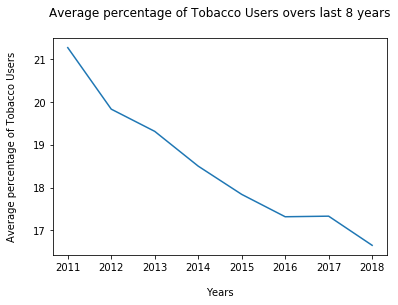

In [2]:
# Build a line plot for each year

tobacco_data_api['data_value'] = pd.to_numeric(tobacco_data_api['data_value'])
tobacco_data_api['data_value'].dtype

tobacco_data_api_grouped = tobacco_data_api.groupby('year').mean()['data_value'].reset_index()
print(tobacco_data_api_grouped)

#Line plot
plt.plot(tobacco_data_api_grouped['year'], tobacco_data_api_grouped['data_value'])

plt.xlabel('\nYears')
plt.ylabel('Average percentage of Tobacco Users\n')
plt.title("Average percentage of Tobacco Users overs last 8 years\n")

plt.savefig("Tobacco_Line_2011_2018_USA.png")

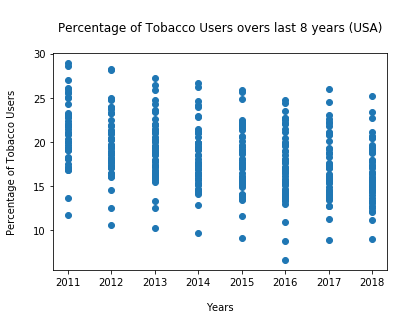

In [3]:
# Build a scatter plot for each year

plt.scatter(tobacco_data_api['year'], tobacco_data_api['data_value'], marker="o")

plt.xlabel('\nYears')
plt.ylabel('Percentage of Tobacco Users\n')
plt.title("\nPercentage of Tobacco Users overs last 8 years (USA)\n")

# Save the figure
plt.savefig("Tobacco_Scatter_2011_2018_USA.png")


The correlation between tobacco use and years is -0.37 



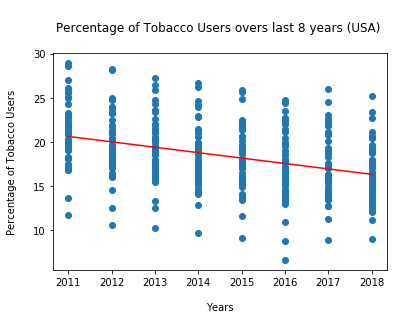

In [6]:
# Calculate the correlation coefficient and linear regression model for tobacco use over last 8 years

tobacco_data_api['year'] = pd.to_numeric(tobacco_data_api['year'])
tobacco_data_api['year'].dtype

'''Correlation Coefficient'''

correlation = st.pearsonr( tobacco_data_api['year'] , tobacco_data_api['data_value'] )
print(f"\nThe correlation between tobacco use and years is {round(correlation[0],2)} \n")


'''Linear Regression Model'''

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tobacco_data_api['year'] , tobacco_data_api['data_value'])
regress_values = tobacco_data_api['year'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


'''Plotting the linear regression model'''

plt.xlabel('\nYears')
plt.ylabel('Percentage of Tobacco Users\n')
plt.title("\nPercentage of Tobacco Users overs last 8 years (USA) \n")

plt.scatter( tobacco_data_api['year'] , tobacco_data_api['data_value'] )
plt.plot(tobacco_data_api['year'],regress_values,"r-")

# Save the figure
plt.savefig("Tobacco_Scatter_2011_2018_USA_Linear_regression.png")
plt.show()

# Findings Summary


###  Is Tobacco usage increases or decreases over the time in USA?
* Tobacco usage has been significantly decreased each year from 2011 to 2018, as numerous actions are implementing to reduce tobacco use to the point that it is no longer a public health problem for the Nation ( "Healthy People 2020" - The goal is to reduce illness, disability, and dealth realted to tobacco use and secondhand smoke exposre. ) 


